# Single Feature Linear Model

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 10 thousands points
x_data = np.linspace(0.0, 10.0, 10000)

In [3]:
# noise
noise = np.random.randn(len(x_data))

In [4]:
# y = m*x + b + noise
y_data = (0.5 * x_data ) + 5 + noise

In [5]:
# create pandas data frame
cols = ['X', 'Y']
my_df = pd.DataFrame(list(zip(x_data, y_data)), columns=cols)
my_df.head()

,X,Y
0,0.000,5.542793
1,0.001,6.819872
2,0.002,5.986652
3,0.003,4.354041
4,0.004,3.935826


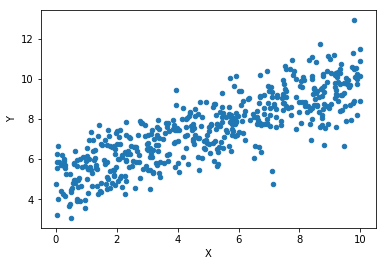

In [6]:
my_df.sample(n=500).plot(kind='scatter', x='X', y='Y')

# TensorFlow 

## Linear Model

In [7]:
import tensorflow as tf

In [8]:
# Pick up random 10 points each time
batch_size = 10

# Reset and create TF session
tf.reset_default_graph() 
sess = tf.Session()     

In [9]:
# Variables
W = tf.Variable(1.0)
b = tf.Variable(1.0)

# Create Summaries
tf.summary.histogram('slopeh', W)   # histogram
tf.summary.scalar('slopes', W)      # scalar
tf.summary.scalar('intercept', b)    

<tf.Tensor 'intercept:0' shape=() dtype=string>

In [10]:
# Placeholders
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [11]:
# Linear Model
y_model = W * xph + b

In [12]:
import os

# Error
error = tf.reduce_sum(tf.square(yph - y_model))  # Square the error
tf.summary.scalar('error', error)                # Create Summaries

# merge all summaries and create a writer object that will write during training
summaries = tf.summary.merge_all()
writer = tf.summary.FileWriter(logdir='./single-feature-linear/linear_logs', graph=sess.graph)

In [13]:
# Init variables
init = tf.variables_initializer([W, b])
sess.run(init)

In [14]:
# run optimization again with smaller learning rate
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# train = opt.minimize(rmse)
train = opt.minimize(error)

In [15]:
batches = 1000
    
for i in range(batches):

    # Random index
    rand_ind = np.random.randint(len(x_data),size=batch_size)

    # Pick up random data from the data set
    feed = {xph:x_data[rand_ind],yph:y_data[rand_ind]}

    # Print out error every 50 steps, otherwise keep training
    if (i%50 == 0) & (i > 0):
        smry, nerror = sess.run([summaries, error], feed_dict=feed)
        writer.add_summary(smry, i)
        print('Test error: {}'.format(nerror))
    else:
        smry, _ = sess.run([summaries, train], feed_dict=feed)
        writer.add_summary(smry, i)
        

Test error: 16.626338958740234
Test error: 26.60120964050293
Test error: 18.18143081665039
Test error: 15.872772216796875
Test error: 12.281600952148438
Test error: 12.28039264678955
Test error: 12.217825889587402
Test error: 13.05111312866211
Test error: 16.33979034423828
Test error: 7.077779769897461
Test error: 16.761428833007812
Test error: 10.57364559173584
Test error: 4.945190906524658
Test error: 6.390972137451172
Test error: 11.490489959716797
Test error: 5.394791603088379
Test error: 5.082497596740723
Test error: 7.213672161102295
Test error: 7.081526756286621


In [16]:
model_w, model_b = sess.run([W,b])
print(model_w)
print(model_b)

0.521988
4.938254


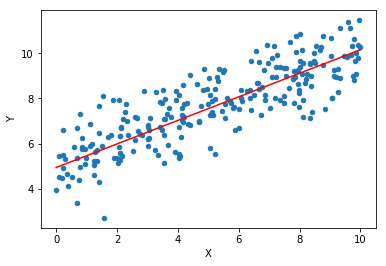

In [17]:
y_hat = x_data * model_w + model_b
my_df.sample(n=250).plot(kind='scatter',x='X',y='Y')
plt.plot(x_data,y_hat,'r')

## TensorFlow API - Linear Regressor

In [18]:
# create feature column and linear regressor estimator

feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/nk/v2fqyl0s6b3gtb2h34pw9pdm0000gp/T/tmpw7leu6o6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x117004a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
# use sklearn test train spliter
from sklearn.model_selection import train_test_split

# 70% training data, 30% test
Xtr, Xts, Ytr, Yts = train_test_split(x_data,y_data,test_size=0.3, random_state = 101)

In [20]:
# input functions

input_func = tf.estimator.inputs.numpy_input_fn({'x' : Xtr},Ytr ,batch_size=10,num_epochs=None,shuffle=True)

train_input_func = tf.estimator.inputs.numpy_input_fn({'x' : Xtr}, Ytr, batch_size=10,num_epochs=1000,shuffle=False)

eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':Xts},Yts,batch_size=10,num_epochs=1000,shuffle=False)

In [21]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/nk/v2fqyl0s6b3gtb2h34pw9pdm0000gp/T/tmpw7leu6o6/model.ckpt.
INFO:tensorflow:loss = 627.2811, step = 1
INFO:tensorflow:global_step/sec: 1067.07
INFO:tensorflow:loss = 26.15951, step = 101 (0.096 sec)
INFO:tensorflow:global_step/sec: 1404.36
INFO:tensorflow:loss = 52.199104, step = 201 (0.071 sec)
INFO:tensorflow:global_step/sec: 1295.4
INFO:tensorflow:loss = 32.0537, step = 301 (0.076 sec)
INFO:tensorflow:global_step/sec: 1471.15
INFO:tensorflow:loss = 25.008963, step = 401 (0.068 sec)
INFO:tensorflow:global_step/sec: 1326.65
INFO:tensorflow:loss = 9.070553, step = 501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1337.99
INFO:tensorflow:loss = 13.74653, step = 601 (0.075 sec)
INFO:tensorflow:glob

In [22]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-06-03:51:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nk/v2fqyl0s6b3gtb2h34pw9pdm0000gp/T/tmpw7leu6o6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-06-03:51:58
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1049023, global_step = 1000, loss = 11.049023


In [23]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-06-03:52:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nk/v2fqyl0s6b3gtb2h34pw9pdm0000gp/T/tmpw7leu6o6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-06-03:52:01
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0885428, global_step = 1000, loss = 10.885428


In [24]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1049023, 'loss': 11.049023, 'global_step': 1000}
eval metrics: {'average_loss': 1.0885428, 'loss': 10.885428, 'global_step': 1000}


In [25]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,20)},shuffle=False)

In [26]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nk/v2fqyl0s6b3gtb2h34pw9pdm0000gp/T/tmpw7leu6o6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


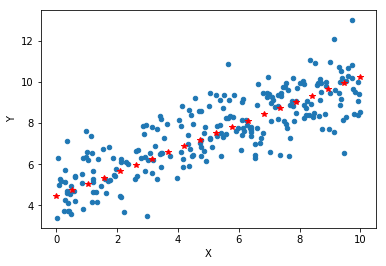

In [27]:
my_df.sample(n=250).plot(kind='scatter',x='X',y='Y')
plt.plot(np.linspace(0,10,20),predictions,'r*')

In [28]:
# print out model variables
tvars = tf.trainable_variables()
tvars_vals = sess.run(tvars)

for var, val in zip(tvars, tvars_vals):
    print(var.name, val)  # Prints the name of the variable alongside its value.

Variable:0 0.521988
Variable_1:0 4.938254
